# Data Import

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualisation
import seaborn as sns

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
%cd /content/drive/My Drive/thesis

/content/drive/My Drive/thesis


In [6]:
df=pd.read_csv("hpcleanvlarge1.csv")
df.head()

,Chapters,Favs,Follows,Published,Reviews,Updated,Words,author,characters,genre,language,rating,story_link,synopsis,title,published_mmyy,pairing
0,1,2,NaN,12/31/2019,1.0,NaN,"6,840",reviews,"Sirius B., Remus L., James P., Regulus B.",Angst/Hurt/Comfort,English,T,https://www.fanfiction.net/s/13466909/1/If-You...,Regulus and James aren't happy. They know they...,If You Change Your Mind,12-2019,NaN
1,1,1,NaN,12/31/2019,NaN,NaN,"10,962",JoyI9199,"Harry P., Draco M., Narcissa M., Charlie W.",Angst/Drama,English,M,https://www.fanfiction.net/s/13466894/1/Bloody...,When a plot from the Founder's age is revealed...,Bloody Ballgowns,12-2019,NaN
2,1,3,2,12/31/2019,NaN,NaN,"8,592",MoonytheMarauder1,"[James P., Regulus B.]",Angst,English,M,https://www.fanfiction.net/s/13466885/1/Nothin...,"Regulus Black is supposed to be dead, but he's...",Nothing Left To Do,12-2019,"James P., Regulus B."
3,2,NaN,NaN,12/31/2019,NaN,NaN,"7,260",LaviniaKatt,Cedric D.,Romance/Fantasy,English,M,https://www.fanfiction.net/s/13466880/1/Patien...,This is a spin off of Harry Potter taking plac...,Patience is a Virtue,12-2019,NaN
4,1,4,3,12/31/2019,NaN,NaN,"1,529",Rowena-Moon-Moon,NaN,NaN,English,T,https://www.fanfiction.net/s/13466807/1/An-Und...,Harry makes a new discovery and perhaps a few ...,An Understanding,12-2019,NaN


In [ ]:
df.shape

(648493, 17)

In [ ]:
df.isna().sum()

Chapters               0
Favs               72163
Follows           143204
Published              0
Reviews            52189
Updated           410228
Words                  0
author                 0
characters         63040
genre              59927
language               0
rating                 0
story_link             0
synopsis              11
title                 16
published_mmyy         0
pairing           256823
dtype: int64

In [7]:
df = df.dropna(subset=['synopsis', 'genre'])

In [ ]:
df.shape

(588557, 17)

# proposal

In [ ]:
lang_count = df[["language", "title"]].copy().groupby(by = "language").count()
lang_count.reset_index(inplace = True) # realign the column names after the groupby
lang_count.sort_values(by = "title", ascending = False, inplace = True) # sort the result by number of stories, from the major one

lang_count

,language,title
11,English,457970
37,Spanish,46892
17,French,42990
32,Portuguese,20157
18,German,9547
31,Polish,3282
24,Indonesian,3228
38,Swedish,761
10,Dutch,714
25,Italian,594


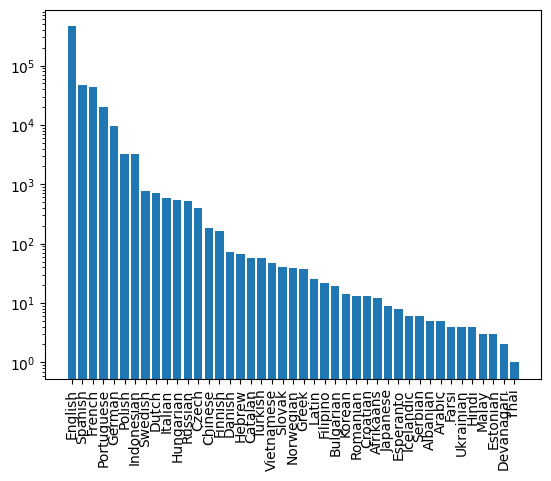

In [ ]:
x = lang_count['language'].values
y = lang_count['title'].values
x_pos = np.arange(len(x)) # define the position of the bars in the plot
plt.bar(x_pos, y)
plt.xticks(x_pos, x, rotation = 90) # define the name of the bars in the chart
plt.yscale("log") # display the y axis on a log scale

plt.show()

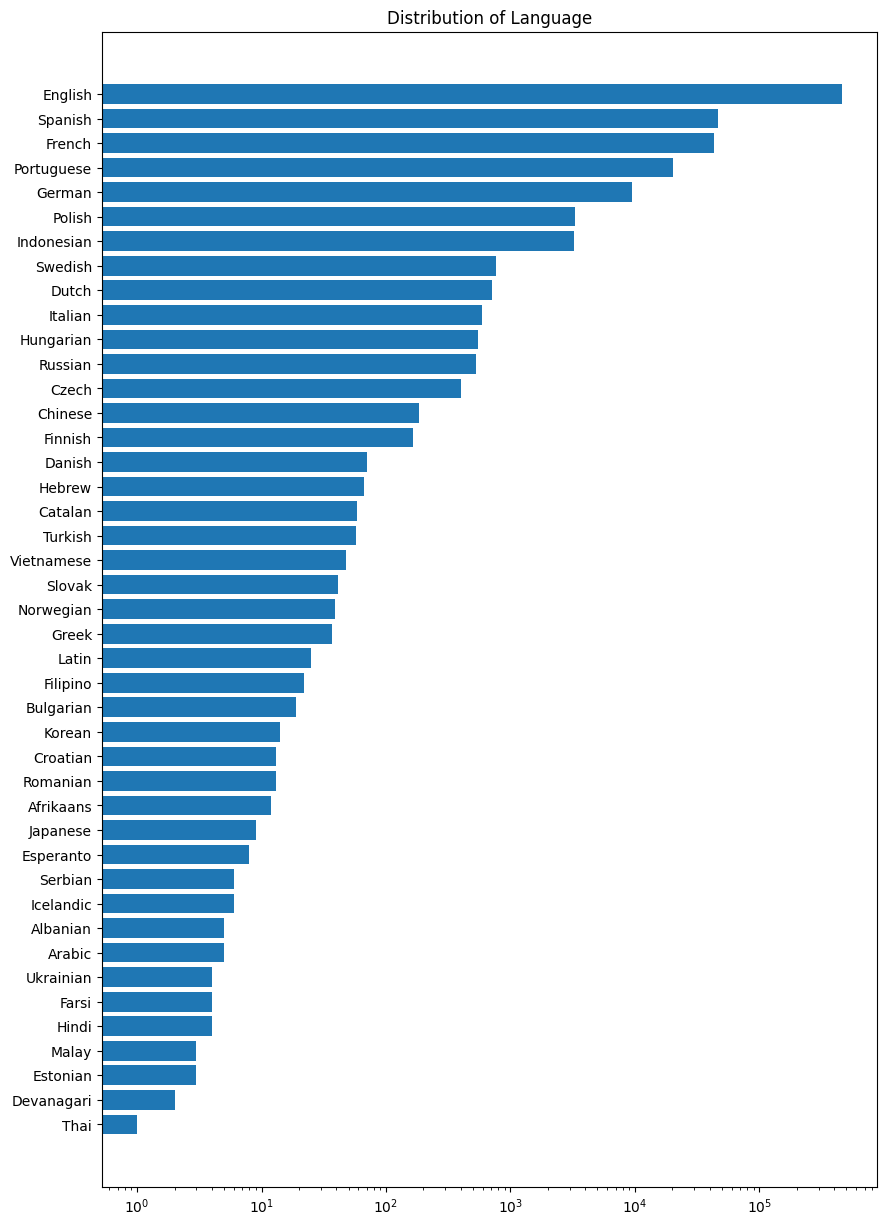

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 假设 lang_count 是你的 DataFrame，已经正确计算了语言和标题的统计
x = lang_count['language'].values
y = lang_count['title'].values
y_pos = np.arange(len(x)) # 定义条形的位置

plt.figure(figsize=(10, 15))
plt.barh(x, y)
plt.xscale("log")
plt.title('Distribution of Language')
plt.gca().invert_yaxis()
plt.show()


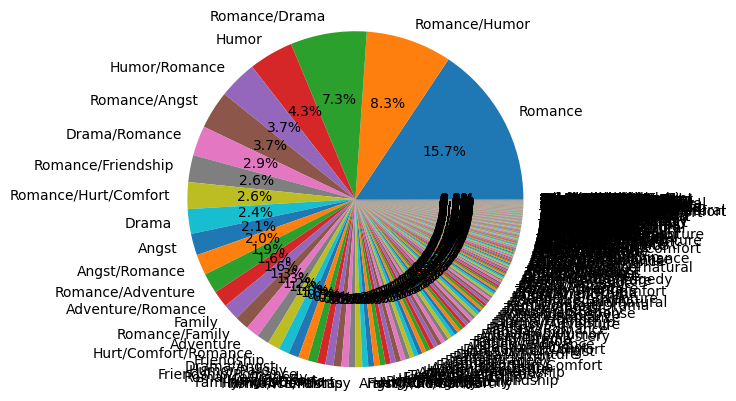

In [ ]:
# 计算类型的出现频率
genre_counts = df['genre'].value_counts()

# 制作饼状图
plt.pie(genre_counts, labels=genre_counts.index, autopct='%1.1f%%')
plt.axis('equal')  # 保证饼图是圆形的
plt.show()

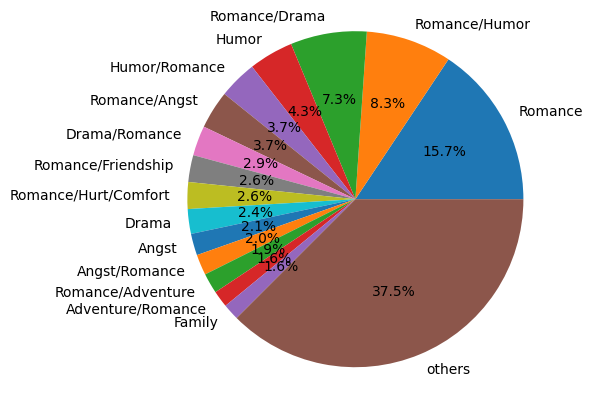

In [ ]:
top_genres = genre_counts.head(15)

# 将其他类别合并为"其他"
other = genre_counts[15:].sum()
top_genres['others'] = other

# 制作饼状图
plt.pie(top_genres, labels=top_genres.index, autopct='%1.1f%%')
plt.axis('equal')  # 保证饼图是圆形的
plt.show()

# preprocessing

In [8]:
def custom_genre_split(genre_string):
    # Temporary replacement for 'Hurt/Comfort'
    genre_string = genre_string.replace('Hurt/Comfort', 'Hurt-Comfort')

    # Now split by '/'
    genres = genre_string.split('/')

    # Revert the replacement
    genres = [genre.replace('Hurt-Comfort', 'Hurt/Comfort') for genre in genres]

    return genres

In [9]:
df['genre'] = df['genre'].apply(custom_genre_split)

In [10]:
from sklearn.preprocessing import MultiLabelBinarizer

# Initialize the MultiLabelBinarizer
mlb = MultiLabelBinarizer()

# Fit and transform the 'genre' lists into a binary matrix
y = mlb.fit_transform(df[df['language'] == 'English']['genre'])

# Output the class labels to verify
print("Labels:", mlb.classes_)

Labels: ['Adventure' 'Angst' 'Crime' 'Drama' 'Family' 'Fantasy' 'Friendship'
 'Horror' 'Humor' 'Hurt/Comfort' 'Mystery' 'Parody' 'Poetry' 'Romance'
 'Sci-Fi' 'Spiritual' 'Supernatural' 'Suspense' 'Tragedy' 'Western']


In [11]:
synopsis = df[df['language'] == 'English']['synopsis']
synopsis.shape

(457975,)

In [ ]:
unique_genres = set()

# 遍历每行的 genre 列
for genre_list in df['genre']:
    # 将列表转换为元组，然后添加到集合中
    unique_genres.add(tuple(genre_list))  # 现在是添加元组到集合中

# 打印独特类别的数量
print(f"共有 {len(unique_genres)} 种独特的类别。")


共有 403 种独特的类别。


In [ ]:
# 打印出前几个类别查看是否正确
print(df['genre'].head(10))


0          [Angst, Hurt/Comfort]
1                 [Angst, Drama]
2                        [Angst]
3             [Romance, Fantasy]
5                       [Sci-Fi]
6                       [Sci-Fi]
7     [Hurt/Comfort, Friendship]
8         [Family, Hurt/Comfort]
9               [Angst, Romance]
10       [Romance, Supernatural]
Name: genre, dtype: object


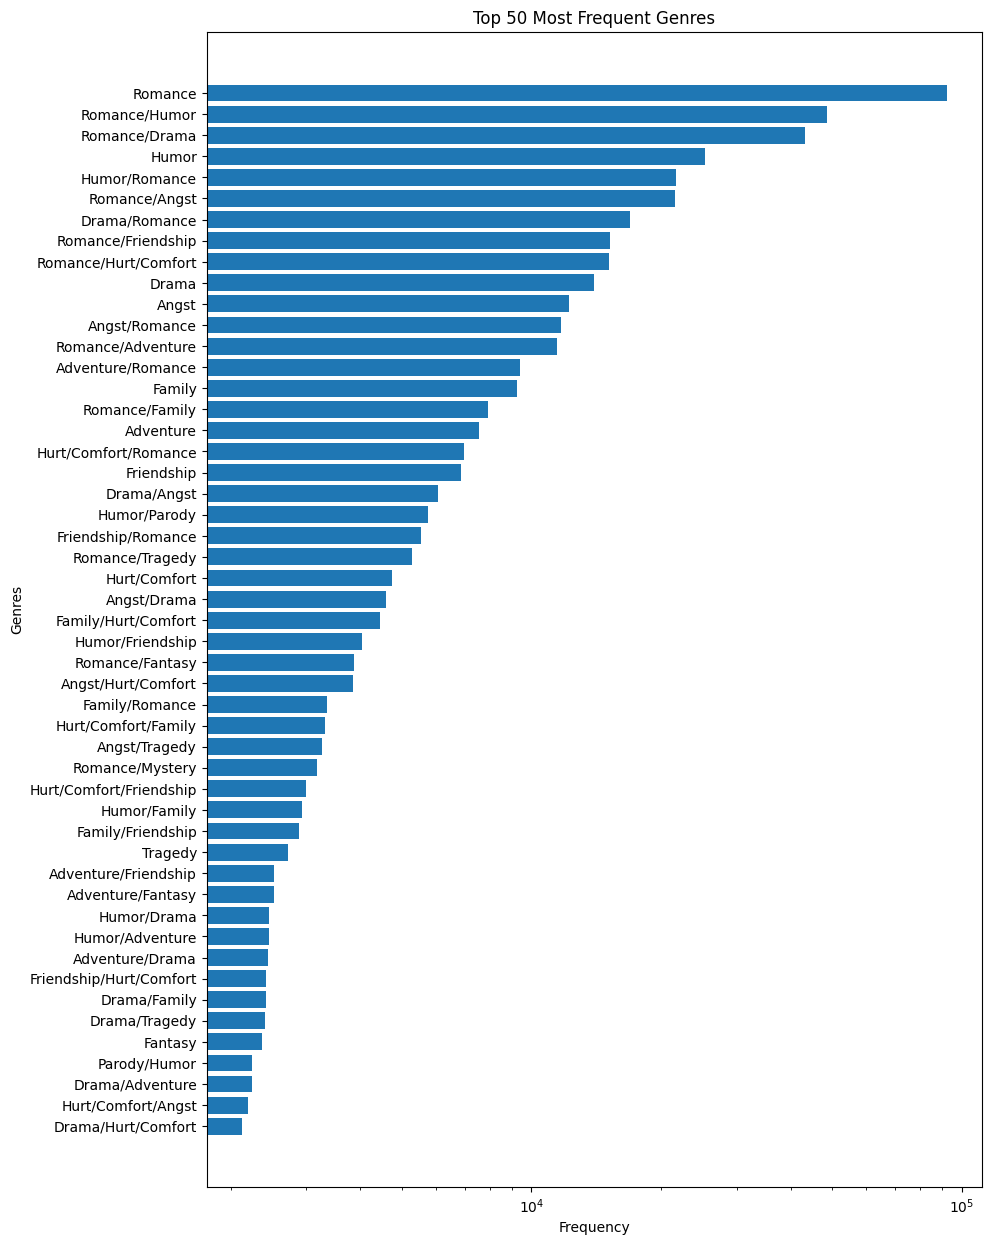

In [ ]:
# 将每个列表转换为由斜杠分隔的字符串
df['genre_string'] = df['genre'].apply(lambda x: '/'.join(x))

# 计算转换后的字符串的出现频率
genre_counts = df['genre_string'].value_counts().head(50)

# 绘制条形图
plt.figure(figsize=(10, 15))
plt.barh(genre_counts.index, genre_counts)
plt.xlabel('Frequency')
plt.ylabel('Genres')
plt.title('Top 50 Most Frequent Genres')
plt.xscale("log")
plt.gca().invert_yaxis()
plt.show()


# bag of words wrong codes

In [ ]:
pip install pandas scikit-learn

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
co = CountVectorizer(
    analyzer='word',
    ngram_range=(1,4),
    max_features=150000
)


In [ ]:
co.fit(synopsis)

CountVectorizer(max_features=150000, ngram_range=(1, 4))

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(synopsis,y,random_state=1234)

In [ ]:
x_train[1]

"When a plot from the Founder's age is revealed, Bailey Ravenclaw reappears in the pureblooded political scene, throwing it into an uproar. When she is sorted into Slytherin, rather than her own house, questions begin to swirl. A voice in her head begins to try and turn her towards the Dark Lord's followers. Political Fiction with minor Dumbledore bashing. Generally following canon."

In [ ]:
x_train = co.transform(x_train)
x_test = co.transform(x_test)

In [ ]:
print("训练数据的特征数量: ", x_train.shape[1])
print("测试数据的特征数量: ", x_test.shape[1])

训练数据的特征数量:  150000
测试数据的特征数量:  150000


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.datasets import make_multilabel_classification
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier

In [ ]:
# Initialize Logistic Regression
logreg = LogisticRegression(solver='liblinear')

# Create the MultiOutputClassifier model
multioutput_classifier = MultiOutputClassifier(logreg)

# Train the model
multioutput_classifier.fit(x_train, y_train)

# Predicting the test set results
Y_pred_multi = multioutput_classifier.predict(y_test)

ValueError: X has 20 features, but LogisticRegression is expecting 150000 features as input.

# bag of words

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

# Assuming df['synopsis'] has been preprocessed to fill any NaNs or None types
synopsis = df[df['language'] == 'English']['synopsis']
y = mlb.fit_transform(df[df['language'] == 'English']['genre'])  # Assuming this line works without issues

# Split your data first
x_train_raw, x_test_raw, y_train, y_test = train_test_split(synopsis, y, test_size=0.25, random_state=1234)

# Initialize your CountVectorizer
co = CountVectorizer(analyzer='word', ngram_range=(1,4), max_features=150000)

# Fit the vectorizer on the TRAINING data only
co.fit(x_train_raw)

# Transform both the training and test datasets
x_train = co.transform(x_train_raw)
x_test = co.transform(x_test_raw)

# bow - logistic regression - Accuracy


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier

# Train your MultiOutputClassifier with Logistic Regression
model = MultiOutputClassifier(LogisticRegression(solver='liblinear'))
model.fit(x_train, y_train)  # Make sure x_train is correctly transformed

# Prediction
y_pred = model.predict(x_test)

In [ ]:
print("Training data shape:", x_train.shape)
print("Test data shape:", x_test.shape)
print("Number of features expected by model:", x_train.shape[1])

Training data shape: (343481, 150000)
Test data shape: (114494, 150000)
Number of features expected by model: 150000


In [ ]:
# Evaluation metrics
from sklearn.metrics import accuracy_score, hamming_loss, f1_score

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Hamming Loss:", hamming_loss(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred, average='micro'))

Accuracy: 0.16174646706377627
Hamming Loss: 0.07726125386483135
F1 Score: 0.4777776793857979


# bow - logistic regression - Partial Accuracy


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import hamming_loss, f1_score
import numpy as np

In [ ]:
def partial_accuracy_score(y_true, y_pred):
    """计算包含匹配的精度。如果预测的标签集合是真实标签集合的子集，则认为是正确的。"""
    n_samples = y_true.shape[0]
    correct = 0
    for true, pred in zip(y_true, y_pred):
        # 将标签数组转换为集合
        true_set = set(np.where(true == 1)[0])
        pred_set = set(np.where(pred == 1)[0])
        # 检查预测集合是否为真实集合的子集
        if pred_set.issubset(true_set):
            correct += 1
    return correct / n_samples

# 训练模型
model = MultiOutputClassifier(LogisticRegression(solver='liblinear'))
model.fit(x_train, y_train)  # 确保x_train已正确转换

# 预测
y_pred = model.predict(x_test)

In [ ]:
# 计算自定义的部分精度
partial_acc = partial_accuracy_score(y_test, y_pred)
print("Partial Accuracy Score:", partial_acc)

# 计算其他指标
hamm_loss_val = hamming_loss(y_test, y_pred)
f1_val = f1_score(y_test, y_pred, average='weighted')
print("Hamming Loss:", hamm_loss_val)
print("F1 Score:", f1_val)

Partial Accuracy Score: 0.5471378412842595
Hamming Loss: 0.07725950704840429
F1 Score: 0.44512193167276765


# bow - Random Forest - Accuracy

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier

# 初始化随机森林分类器
# 注意：随机森林参数应根据您的具体需求进行调整
# n_estimators是森林中树的数量，max_depth是树的最大深度
rf_classifier = RandomForestClassifier(n_estimators=50,  min_samples_split=10,  # 增加样本的采样间隔
    min_samples_leaf=4,  # 增加叶子节点的最小样本数
    max_features='sqrt',  # 使用部分特征
    bootstrap=True,  # 使用引导样本
    n_jobs=-1,  # 并行计算
    random_state=1234)

# 由于您正在进行多标签分类，您需要使用MultiOutputClassifier来包装您的随机森林
multioutput_rf_classifier = MultiOutputClassifier(rf_classifier, n_jobs=-1)

# 训练随机森林
# 这可能需要一些时间，具体取决于数据量和计算资源
multioutput_rf_classifier.fit(x_train, y_train)

# 进行预测
y_pred = multioutput_rf_classifier.predict(x_test)




In [ ]:
# 评估模型性能
from sklearn.metrics import accuracy_score, f1_score, hamming_loss

# 计算准确率，F1分数和汉明损失
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='micro') # 对于多标签数据，'micro'平均可能更为合适
hamming = hamming_loss(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'F1 Score: {f1}')
print(f'Hamming Loss: {hamming}')

# bow - Random Forest - Partial Accuracy

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import f1_score, hamming_loss
import numpy as np

In [ ]:
# 定义部分准确率计算函数
def partial_accuracy_score(y_true, y_pred):
    """计算包含匹配的精度，如果预测的标签集合是真实标签集合的非空子集，则认为是正确的。"""
    n_samples = y_true.shape[0]
    correct = 0
    for true, pred in zip(y_true, y_pred):
        true_set = set(np.where(true == 1)[0])
        pred_set = set(np.where(pred == 1)[0])
        if pred_set and pred_set.issubset(true_set):
            correct += 1
    return correct / n_samples

# 初始化随机森林分类器
rf_classifier = RandomForestClassifier(
    n_estimators=50,
    min_samples_split=10,
    min_samples_leaf=4,
    max_features='sqrt',
    bootstrap=True,
    n_jobs=-1,  # 并行计算
    random_state=1234
)

# 使用MultiOutputClassifier包装随机森林
multioutput_rf_classifier = MultiOutputClassifier(rf_classifier, n_jobs=-1)

# 训练模型
multioutput_rf_classifier.fit(x_train, y_train)

# 进行预测
y_pred = multioutput_rf_classifier.predict(x_test)

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


In [ ]:
# 计算自定义的部分准确率
partial_acc = partial_accuracy_score(y_test, y_pred)
print("Partial Accuracy Score:", partial_acc)

# 计算F1分数和汉明损失
f1 = f1_score(y_test, y_pred, average='micro')
hamming = hamming_loss(y_test, y_pred)

print(f'F1 Score: {f1}')
print(f'Hamming Loss: {hamming}')

Partial Accuracy Score: 0.5240973326113159
F1 Score: 0.43546030199707747
Hamming Loss: 0.06883504812479256


# bow - CNN - Accuracy


In [ ]:
!pip install scikeras


In [ ]:
import tensorflow as tf
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import accuracy_score, hamming_loss, f1_score
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Conv1D, MaxPooling1D, GlobalMaxPooling1D, Embedding, Dropout
from tensorflow.keras.optimizers import Adam

In [ ]:
# 定义生成器
def data_generator(x, y, batch_size):
    size = x.shape[0]
    indices = np.arange(size)
    np.random.shuffle(indices)
    x = x[indices]
    y = y[indices]
    i = 0
    while True:
        if i + batch_size <= size:
            x_batch = x[i:i+batch_size].toarray()
            y_batch = y[i:i+batch_size]
            i += batch_size
            yield x_batch, y_batch
        else:
            i = 0
            np.random.shuffle(indices)
            continue

# 模型定义使用Functional API
inputs = Input(shape=(x_train.shape[1],))
x = Embedding(input_dim=50000, output_dim=50)(inputs)
x = Conv1D(filters=128, kernel_size=5, activation='relu')(x)
x = MaxPooling1D(pool_size=5)(x)
x = GlobalMaxPooling1D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
outputs = Dense(y_train.shape[1], activation='sigmoid')(x)
model = Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# 训练模型
train_gen = data_generator(x_train, y_train, batch_size=32)
model.fit(train_gen, steps_per_epoch=int(np.ceil(x_train.shape[0] / 32)), epochs=5, verbose=1)


Epoch 1/5
10734/10734 ━━━━━━━━━━━━━━━━━━━━ 1906s 174ms/step - accuracy: 0.1602 - loss: 0.2206
Epoch 2/5
10734/10734 ━━━━━━━━━━━━━━━━━━━━ 1868s 174ms/step - accuracy: 0.1606 - loss: 0.2111
Epoch 3/5
10734/10734 ━━━━━━━━━━━━━━━━━━━━ 1869s 174ms/step - accuracy: 0.1606 - loss: 0.2103
Epoch 4/5
10734/10734 ━━━━━━━━━━━━━━━━━━━━ 1868s 174ms/step - accuracy: 0.1607 - loss: 0.2100
Epoch 5/5
10734/10734 ━━━━━━━━━━━━━━━━━━━━ 1867s 174ms/step - accuracy: 0.1608 - loss: 0.2098


In [ ]:
# 定义生成器
def data_generator(x, y, batch_size, is_train=True):
    size = x.shape[0]
    indices = np.arange(size)
    if is_train:
        np.random.shuffle(indices)  # 只在训练时打乱顺序
    x = x[indices]
    y = y[indices]
    i = 0
    while True:
        if i + batch_size <= size:
            x_batch = x[i:i+batch_size].toarray()
            y_batch = y[i:i+batch_size]
            i += batch_size
            yield x_batch, y_batch
        else:
            if not is_train:
                # 在测试时处理最后一个批次，确保输出样本数正确
                x_batch = x[i:].toarray()
                y_batch = y[i:]
                yield x_batch, y_batch
                break  # 确保最后一个批次后停止迭代
            i = 0
            np.random.shuffle(indices)

# 修改模型评估部分
test_gen = data_generator(x_test, y_test, batch_size=32, is_train=False)
preds = model.predict(test_gen, steps=int(np.ceil(x_test.shape[0] / 32)))
y_pred_binary = (preds > 0.5).astype(int)

# 确保y_pred_binary和y_test长度相同
if y_pred_binary.shape[0] != y_test.shape[0]:
    y_pred_binary = y_pred_binary[:y_test.shape[0]]

# 重新计算评估指标
from sklearn.metrics import accuracy_score, hamming_loss, f1_score

acc = accuracy_score(y_test, y_pred_binary)
hamm_loss = hamming_loss(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary, average='weighted')

print("Accuracy Score:", acc)
print("Hamming Loss:", hamm_loss)
print("F1 Score:", f1)


3578/3578 ━━━━━━━━━━━━━━━━━━━━ 75s 21ms/step
Accuracy Score: 0.14001607071112895
Hamming Loss: 0.07613499397348332
F1 Score: 0.2569631836085356


# bow - CNN - Partial Accuracy


In [ ]:
!pip install scikeras

In [ ]:
import tensorflow as tf
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import accuracy_score, hamming_loss, f1_score
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Conv1D, MaxPooling1D, GlobalMaxPooling1D, Embedding, Dropout
from tensorflow.keras.optimizers import Adam


In [ ]:
# 定义包含匹配的准确率计算函数
def partial_accuracy_score(y_true, y_pred):
    correct = 0
    for true, pred in zip(y_true, y_pred):
        true_set = set(np.where(true == 1)[0])
        pred_set = set(np.where(pred == 1)[0])
        if pred_set.issubset(true_set):
            correct += 1
    return correct / len(y_true)

# 定义生成器
def data_generator(x, y, batch_size):
    size = x.shape[0]
    indices = np.arange(size)
    np.random.shuffle(indices)
    x = x[indices]
    y = y[indices]
    i = 0
    while True:
        if i + batch_size <= size:
            x_batch = x[i:i+batch_size].toarray()
            y_batch = y[i:i+batch_size]
            i += batch_size
            yield x_batch, y_batch
        else:
            i = 0
            np.random.shuffle(indices)
            continue

# 模型定义使用Functional API
inputs = Input(shape=(x_train.shape[1],))
x = Embedding(input_dim=50000, output_dim=50)(inputs)
x = Conv1D(filters=128, kernel_size=5, activation='relu')(x)
x = MaxPooling1D(pool_size=5)(x)
x = GlobalMaxPooling1D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
outputs = Dense(y_train.shape[1], activation='sigmoid')(x)
model = Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# 训练模型
train_gen = data_generator(x_train, y_train, batch_size=32)
model.fit(train_gen, steps_per_epoch=int(np.ceil(x_train.shape[0] / 32)), epochs=5, verbose=1)

Epoch 1/5
10734/10734 ━━━━━━━━━━━━━━━━━━━━ 1898s 173ms/step - accuracy: 0.1585 - loss: 0.2212
Epoch 2/5
10734/10734 ━━━━━━━━━━━━━━━━━━━━ 1861s 173ms/step - accuracy: 0.1601 - loss: 0.2112
Epoch 3/5
10734/10734 ━━━━━━━━━━━━━━━━━━━━ 1861s 173ms/step - accuracy: 0.1600 - loss: 0.2105
Epoch 4/5
10734/10734 ━━━━━━━━━━━━━━━━━━━━ 1860s 173ms/step - accuracy: 0.1601 - loss: 0.2101
Epoch 5/5
10734/10734 ━━━━━━━━━━━━━━━━━━━━ 1859s 173ms/step - accuracy: 0.1600 - loss: 0.2099


In [ ]:
# 执行预测
test_gen = data_generator(x_test, y_test, batch_size=32)
preds = model.predict(test_gen, steps=int(np.ceil(x_test.shape[0] / 32)))
y_pred_binary = (preds > 0.5).astype(int)

# 确保预测结果和真实标签长度一致
y_pred_binary = y_pred_binary[:y_test.shape[0]]

# 现在使用评估函数
partial_acc = partial_accuracy_score(y_test, y_pred_binary)
hamm_loss = hamming_loss(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary, average='weighted')

print("Partial Accuracy Score:", partial_acc)
print("Hamming Loss:", hamm_loss)
print("F1 Score:", f1)


3578/3578 ━━━━━━━━━━━━━━━━━━━━ 71s 20ms/step
Partial Accuracy Score: 0.589524341886911
Hamming Loss: 0.07613499397348332
F1 Score: 0.2569631836085356


# Word2Vec

In [12]:
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [13]:
# 分词处理
tokenized_texts = [word_tokenize(text.lower()) for text in synopsis]

# 训练Word2Vec模型
model = Word2Vec(sentences=tokenized_texts, vector_size=200, window=10, min_count=5, workers=4, sg=1)

# 使用模型
word_vectors = model.wv

In [14]:
def document_vector(word_vec_model, doc):
    # 删除文档中不在词汇表中的词
    doc = [word for word in doc if word in word_vec_model.key_to_index]
    if len(doc) == 0:
        return np.zeros(word_vec_model.vector_size)
    else:
        return np.mean(word_vec_model[doc], axis=0)

# 应用上面的函数到每个文档
x = np.array([document_vector(word_vectors, text) for text in tokenized_texts])

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

# w2v - logistic regression - Accuracy

In [ ]:
# 初始化并训练多输出分类器
model = MultiOutputClassifier(LogisticRegression(solver='liblinear'))
model.fit(X_train, Y_train)

MultiOutputClassifier(estimator=LogisticRegression(solver='liblinear'))

In [ ]:
Y_pred = model.predict(X_test)


accuracy = accuracy_score(Y_test, Y_pred)
f1 = f1_score(Y_test, Y_pred, average='micro')  # 使用micro平均
hamming = hamming_loss(Y_test, Y_pred)

print(f'Accuracy: {accuracy}')
print(f'F1 Score: {f1}')
print(f'Hamming Loss: {hamming}')

Accuracy: 0.15225251978269605
F1 Score: 0.4605748890455846
Hamming Loss: 0.06815204290181145


# w2v - logistic regression - Partial Accuracy

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import hamming_loss, f1_score
import numpy as np


In [ ]:
def partial_accuracy_score(y_true, y_pred):
    """计算包含匹配的精度。如果预测的标签集合是真实标签集合的子集，则认为是正确的。"""
    n_samples = y_true.shape[0]
    correct = 0
    for true, pred in zip(y_true, y_pred):
        # 将标签数组转换为集合
        true_set = set(np.where(true == 1)[0])
        pred_set = set(np.where(pred == 1)[0])
        # 检查预测集合是否为真实集合的子集
        if pred_set.issubset(true_set):
            correct += 1
    return correct / n_samples

# 训练模型
model = MultiOutputClassifier(LogisticRegression(solver='liblinear'))
model.fit(x_train, y_train)  # 确保x_train已正确转换

# 预测
y_pred = model.predict(x_test)

In [ ]:
# 计算自定义的部分精度
partial_acc = partial_accuracy_score(y_test, y_pred)
print("Partial Accuracy Score:", partial_acc)

# 计算其他指标
hamm_loss_val = hamming_loss(y_test, y_pred)
f1_val = f1_score(y_test, y_pred, average='weighted')
print("Hamming Loss:", hamm_loss_val)
print("F1 Score:", f1_val)

Partial Accuracy Score: 0.7673677223260608
Hamming Loss: 0.06813588484986113
F1 Score: 0.35873133609916286


# w2v - Random Forest- Accuracy

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier

# 初始化随机森林分类器
# 注意：随机森林参数应根据您的具体需求进行调整
# n_estimators是森林中树的数量，max_depth是树的最大深度
rf_classifier = RandomForestClassifier(n_estimators=50,  min_samples_split=10,  # 增加样本的采样间隔
    min_samples_leaf=4,  # 增加叶子节点的最小样本数
    max_features='sqrt',  # 使用部分特征
    bootstrap=True,  # 使用引导样本
    n_jobs=-1,  # 并行计算
    random_state=1234)

# 由于您正在进行多标签分类，您需要使用MultiOutputClassifier来包装您的随机森林
multioutput_rf_classifier = MultiOutputClassifier(rf_classifier, n_jobs=-1)

# 训练随机森林
# 这可能需要一些时间，具体取决于数据量和计算资源
multioutput_rf_classifier.fit(x_train, y_train)

# 进行预测
y_pred = multioutput_rf_classifier.predict(x_test)




/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


In [ ]:
# 评估模型性能
from sklearn.metrics import accuracy_score, f1_score, hamming_loss

# 计算准确率，F1分数和汉明损失
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='micro') # 对于多标签数据，'micro'平均可能更为合适
hamming = hamming_loss(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'F1 Score: {f1}')
print(f'Hamming Loss: {hamming}')

Accuracy: 0.13294146418152916
F1 Score: 0.43546030199707747
Hamming Loss: 0.06883504812479256


# w2v - Random Forest- Partial Accuracy


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import f1_score, hamming_loss
import numpy as np

In [ ]:
# 定义部分准确率计算函数
def partial_accuracy_score(y_true, y_pred):
    """计算包含匹配的精度，如果预测的标签集合是真实标签集合的非空子集，则认为是正确的。"""
    n_samples = y_true.shape[0]
    correct = 0
    for true, pred in zip(y_true, y_pred):
        true_set = set(np.where(true == 1)[0])
        pred_set = set(np.where(pred == 1)[0])
        if pred_set and pred_set.issubset(true_set):
            correct += 1
    return correct / n_samples

# 初始化随机森林分类器
rf_classifier = RandomForestClassifier(
    n_estimators=50,
    min_samples_split=10,
    min_samples_leaf=4,
    max_features='sqrt',
    bootstrap=True,
    n_jobs=-1,  # 并行计算
    random_state=1234
)

# 使用MultiOutputClassifier包装随机森林
multioutput_rf_classifier = MultiOutputClassifier(rf_classifier, n_jobs=-1)

# 训练模型
multioutput_rf_classifier.fit(x_train, y_train)

# 进行预测
y_pred = multioutput_rf_classifier.predict(x_test)

In [ ]:
# 计算自定义的部分准确率
partial_acc = partial_accuracy_score(y_test, y_pred)
print("Partial Accuracy Score:", partial_acc)

# 计算F1分数和汉明损失
f1 = f1_score(y_test, y_pred, average='micro')
hamming = hamming_loss(y_test, y_pred)

print(f'F1 Score: {f1}')
print(f'Hamming Loss: {hamming}')

Partial Accuracy Score: 0.5033713557042291
F1 Score: 0.4307378099114742
Hamming Loss: 0.06986829004139955


# w2v - CNN- Accuracy



In [ ]:
!pip install scikeras

In [ ]:
import tensorflow as tf
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import accuracy_score, hamming_loss, f1_score
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Conv1D, MaxPooling1D, GlobalMaxPooling1D, Embedding, Dropout
from tensorflow.keras.optimizers import Adam

In [ ]:
# 定义生成器
def data_generator(x, y, batch_size):
    size = x.shape[0]
    indices = np.arange(size)
    np.random.shuffle(indices)
    x = x[indices]
    y = y[indices]
    i = 0
    while True:
        if i + batch_size <= size:
            x_batch = x[i:i+batch_size].toarray()
            y_batch = y[i:i+batch_size]
            i += batch_size
            yield x_batch, y_batch
        else:
            i = 0
            np.random.shuffle(indices)
            continue

# 模型定义使用Functional API
inputs = Input(shape=(x_train.shape[1],))
x = Embedding(input_dim=50000, output_dim=50)(inputs)
x = Conv1D(filters=128, kernel_size=5, activation='relu')(x)
x = MaxPooling1D(pool_size=5)(x)
x = GlobalMaxPooling1D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
outputs = Dense(y_train.shape[1], activation='sigmoid')(x)
model = Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# 训练模型
train_gen = data_generator(x_train, y_train, batch_size=32)
model.fit(train_gen, steps_per_epoch=int(np.ceil(x_train.shape[0] / 32)), epochs=5, verbose=1)

Epoch 1/5
10734/10734 ━━━━━━━━━━━━━━━━━━━━ 1871s 174ms/step - accuracy: 0.1573 - loss: 0.2221
Epoch 2/5
10734/10734 ━━━━━━━━━━━━━━━━━━━━ 1868s 174ms/step - accuracy: 0.1589 - loss: 0.2116
Epoch 3/5
10734/10734 ━━━━━━━━━━━━━━━━━━━━ 1868s 174ms/step - accuracy: 0.1589 - loss: 0.2110
Epoch 4/5
10734/10734 ━━━━━━━━━━━━━━━━━━━━ 1869s 174ms/step - accuracy: 0.1590 - loss: 0.2106
Epoch 5/5
10734/10734 ━━━━━━━━━━━━━━━━━━━━ 1870s 174ms/step - accuracy: 0.1589 - loss: 0.2103


In [ ]:
# 定义生成器
def data_generator(x, y, batch_size, is_train=True):
    size = x.shape[0]
    indices = np.arange(size)
    if is_train:
        np.random.shuffle(indices)  # 只在训练时打乱顺序
    x = x[indices]
    y = y[indices]
    i = 0
    while True:
        if i + batch_size <= size:
            x_batch = x[i:i+batch_size].toarray()
            y_batch = y[i:i+batch_size]
            i += batch_size
            yield x_batch, y_batch
        else:
            if not is_train:
                # 在测试时处理最后一个批次，确保输出样本数正确
                x_batch = x[i:].toarray()
                y_batch = y[i:]
                yield x_batch, y_batch
                break  # 确保最后一个批次后停止迭代
            i = 0
            np.random.shuffle(indices)

# 修改模型评估部分
test_gen = data_generator(x_test, y_test, batch_size=32, is_train=False)
preds = model.predict(test_gen, steps=int(np.ceil(x_test.shape[0] / 32)))
y_pred_binary = (preds > 0.5).astype(int)

# 确保y_pred_binary和y_test长度相同
if y_pred_binary.shape[0] != y_test.shape[0]:
    y_pred_binary = y_pred_binary[:y_test.shape[0]]

# 重新计算评估指标
from sklearn.metrics import accuracy_score, hamming_loss, f1_score

acc = accuracy_score(y_test, y_pred_binary)
hamm_loss = hamming_loss(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary, average='weighted')

print("Accuracy Score:", acc)
print("Hamming Loss:", hamm_loss)
print("F1 Score:", f1)


3578/3578 ━━━━━━━━━━━━━━━━━━━━ 72s 20ms/step
Accuracy Score: 0.14000733662899367
Hamming Loss: 0.07613499397348332
F1 Score: 0.25696220047744306


# w2v - CNN- Partial Accuracy


In [2]:
!pip install scikeras

In [16]:
import tensorflow as tf
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import accuracy_score, hamming_loss, f1_score
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Conv1D, MaxPooling1D, GlobalMaxPooling1D, Embedding, Dropout
from tensorflow.keras.optimizers import Adam

In [17]:
def data_generator(x, y, batch_size):
    size = x.shape[0]
    indices = np.arange(size)
    np.random.shuffle(indices)
    x = x[indices]
    y = y[indices]
    i = 0
    while True:
        if i + batch_size <= size:
            if hasattr(x[i:i+batch_size], 'toarray'):  # 检查对象是否有 .toarray() 方法
                x_batch = x[i:i+batch_size].toarray()  # 对于稀疏矩阵，转换为密集数组
            else:
                x_batch = x[i:i+batch_size]  # 对于非稀疏矩阵，直接使用
            y_batch = y[i:i+batch_size]
            i += batch_size
            yield x_batch, y_batch
        else:
            i = 0
            np.random.shuffle(indices)


# 模型定义使用Functional API
inputs = Input(shape=(x_train.shape[1],))
x = Embedding(input_dim=50000, output_dim=50)(inputs)
x = Conv1D(filters=128, kernel_size=5, activation='relu')(x)
x = MaxPooling1D(pool_size=5)(x)
x = GlobalMaxPooling1D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
outputs = Dense(y_train.shape[1], activation='sigmoid')(x)
model = Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# 训练模型
train_gen = data_generator(x_train, y_train, batch_size=32)
model.fit(train_gen, steps_per_epoch=int(np.ceil(x_train.shape[0] / 32)), epochs=5, verbose=1)

Epoch 1/5
10734/10734 ━━━━━━━━━━━━━━━━━━━━ 39s 3ms/step - accuracy: 0.1585 - loss: 0.2215
Epoch 2/5
10734/10734 ━━━━━━━━━━━━━━━━━━━━ 33s 3ms/step - accuracy: 0.1596 - loss: 0.2123
Epoch 3/5
10734/10734 ━━━━━━━━━━━━━━━━━━━━ 34s 3ms/step - accuracy: 0.1596 - loss: 0.2117
Epoch 4/5
10734/10734 ━━━━━━━━━━━━━━━━━━━━ 34s 3ms/step - accuracy: 0.1597 - loss: 0.2114
Epoch 5/5
10734/10734 ━━━━━━━━━━━━━━━━━━━━ 34s 3ms/step - accuracy: 0.1597 - loss: 0.2112


In [ ]:
# 执行预测
test_gen = data_generator(x_test, y_test, batch_size=32)
preds = model.predict(test_gen, steps=int(np.ceil(x_test.shape[0] / 32)))
y_pred_binary = (preds > 0.5).astype(int)

# 确保预测结果和真实标签长度一致
y_pred_binary = y_pred_binary[:y_test.shape[0]]

# 现在使用评估函数
partial_acc = partial_accuracy_score(y_test, y_pred_binary)
acc = accuracy_score(y_test, y_pred_binary)
hamm_loss = hamming_loss(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary, average='weighted')

print("Accuracy Score:", acc)
print("Partial Accuracy Score:", partial_acc)
print("Hamming Loss:", hamm_loss)
print("F1 Score:", f1)


3578/3578 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step
Partial Accuracy Score: 0.5892972557513931
Hamming Loss: 0.076111411951718
F1 Score: 0.2569417295064877


In [19]:
test_gen = data_generator(x_test, y_test, batch_size=32)  # 使用合适的批次大小
x_test_batch, y_test_batch = next(test_gen)  # 获取一个批次的测试数据
y_pred_batch = model.predict(x_test_batch)
y_pred_batch_binary = (y_pred_batch > 0.5).astype(int)  # 转换概率为二进制标签
from sklearn.metrics import multilabel_confusion_matrix

# 生成多标签混淆矩阵
conf_matrices = multilabel_confusion_matrix(y_test_batch, y_pred_batch_binary)

# 显示每个类别的混淆矩阵
print("Confusion Matrices:")
for label, matrix in zip(mlb.classes_, conf_matrices):
    print(f"Label '{label}':")
    print(matrix)
    print()  # 添加空行以提高可读性


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Confusion Matrices:
Label 'Adventure':
[[29  0]
 [ 3  0]]

Label 'Angst':
[[30  0]
 [ 2  0]]

Label 'Crime':
[[31  0]
 [ 1  0]]

Label 'Drama':
[[24  0]
 [ 8  0]]

Label 'Family':
[[30  0]
 [ 2  0]]

Label 'Fantasy':
[[32  0]
 [ 0  0]]

Label 'Friendship':
[[29  0]
 [ 3  0]]

Label 'Horror':
[[31  0]
 [ 1  0]]

Label 'Humor':
[[21  0]
 [11  0]]

Label 'Hurt/Comfort':
[[30  0]
 [ 2  0]]

Label 'Mystery':
[[30  0]
 [ 2  0]]

Label 'Parody':
[[31  0]
 [ 1  0]]

Label 'Poetry':
[[31  0]
 [ 1  0]]

Label 'Romance':
[[ 0 19]
 [ 0 13]]

Label 'Sci-Fi':
[[32  0]
 [ 0  0]]

Label 'Spiritual':
[[32  0]
 [ 0  0]]

Label 'Supernatural':
[[32  0]
 [ 0  0]]

Label 'Suspense':
[[32  0]
 [ 0  0]]

Label 'Tragedy':
[[30  0]
 [ 2  0]]

Label 'Western':
[[32  0]
 [ 0  0]]



In [21]:
!pip install matplotlib seaborn


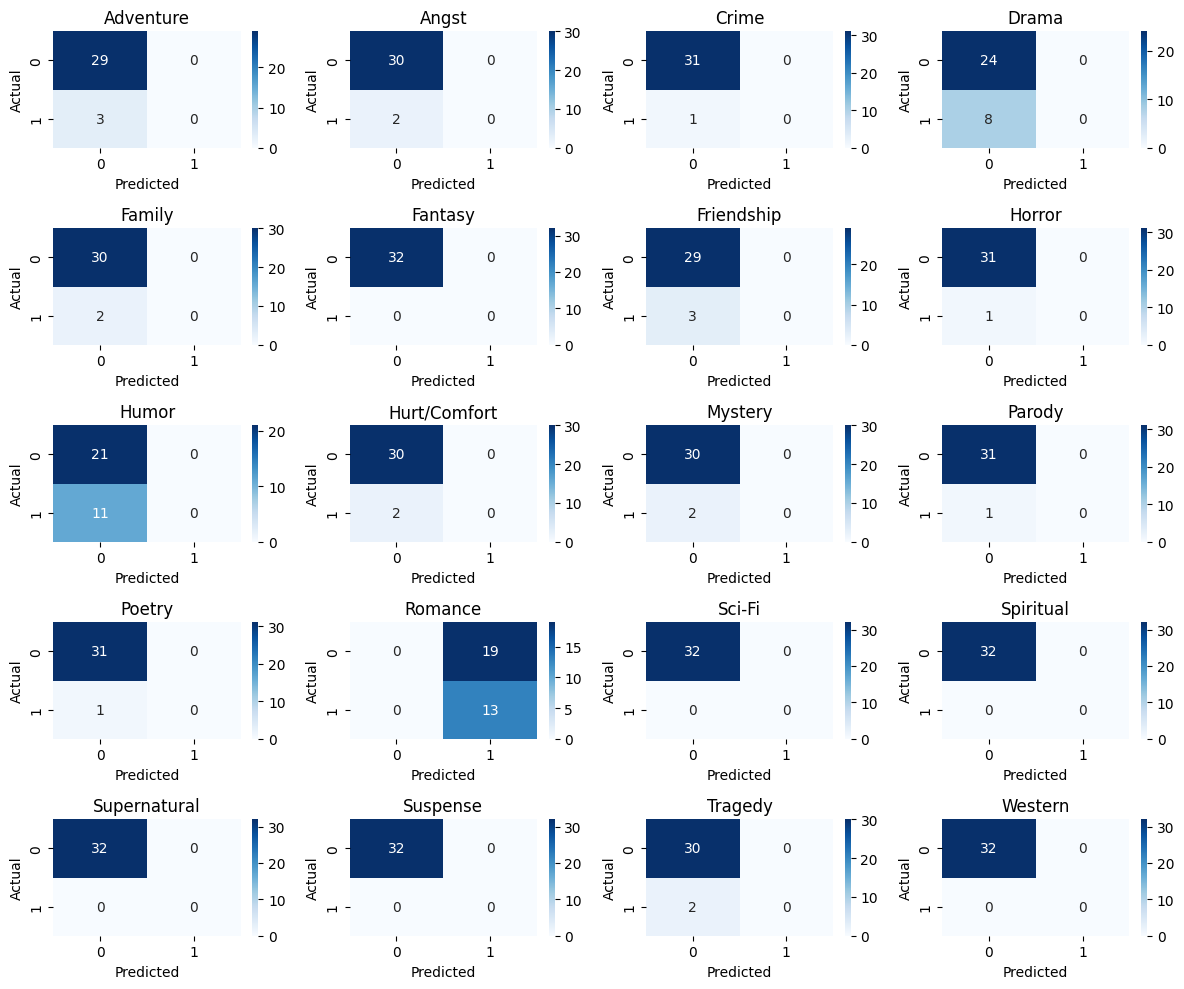

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# 假设 conf_matrices 是你的混淆矩阵数组，mlb.classes_ 包含了标签名称
labels = mlb.classes_
conf_matrices = multilabel_confusion_matrix(y_test_batch, y_pred_batch_binary)

# 设置图形大小
plt.figure(figsize=(12, 10))

# 遍历所有的混淆矩阵并为每个标签画图
for i, matrix in enumerate(conf_matrices):
    plt.subplot(5, 4, i + 1)  # 调整子图位置，这里假设有多于4个标签，需要调整布局
    sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues')
    plt.title(labels[i])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

plt.tight_layout()  # 调整布局，避免重叠
plt.show()


# BERT (tried but failed)

In [ ]:
def custom_genre_split(genre_string):
    # 检查输入是否为字符串
    if isinstance(genre_string, str):
        # 如果是字符串，执行替换操作
        genre_string = genre_string.replace('Hurt/Comfort', 'Hurt-Comfort')
        genres = genre_string.split('/')
        genres = [genre.replace('Hurt-Comfort', 'Hurt/Comfort') for genre in genres]
    else:
        # 如果输入不是字符串，直接返回原始列表
        genres = genre_string

    return genres


In [ ]:
df['genre'] = df['genre'].apply(custom_genre_split)

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer

# Initialize the MultiLabelBinarizer
mlb = MultiLabelBinarizer()

# Fit and transform the 'genre' lists into a binary matrix
y = mlb.fit_transform(df[df['language'] == 'English']['genre'])

# Output the class labels to verify
print("Labels:", mlb.classes_)

Labels: ['Adventure' 'Angst' 'Crime' 'Drama' 'Family' 'Fantasy' 'Friendship'
 'Horror' 'Humor' 'Hurt/Comfort' 'Mystery' 'Parody' 'Poetry' 'Romance'
 'Sci-Fi' 'Spiritual' 'Supernatural' 'Suspense' 'Tragedy' 'Western']


In [ ]:
import subprocess

# 卸载transformers包
subprocess.run(['pip', 'uninstall', 'transformers', '-y'], check=True)

# 清除pip缓存
subprocess.run(['pip', 'cache', 'purge'], check=True)

subprocess.run(["pip", "install", "transformers"], check=True)

CompletedProcess(args=['pip', 'install', 'transformers'], returncode=0)

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer

# 假设df['genre']已经被正确处理成列表格式
mlb = MultiLabelBinarizer()
y = mlb.fit_transform(df['genre'])

# 检查每个类别的样本数量
class_counts = y.sum(axis=0)
single_member_classes = [mlb.classes_[i] for i, count in enumerate(class_counts) if count < 2]

# 如果存在单一成员类别，删除这些类别
if single_member_classes:
    # 找到要保留的类别索引
    keep_idxs = [i for i, count in enumerate(class_counts) if count >= 2]
    # 更新类别和目标变量y
    mlb.classes_ = mlb.classes_[keep_idxs]
    y = y[:, keep_idxs]

print("更新后的类别:", mlb.classes_)


更新后的类别: ['Adventure' 'Angst' 'Crime' 'Drama' 'Family' 'Fantasy' 'Friendship'
 'Horror' 'Humor' 'Hurt/Comfort' 'Mystery' 'Parody' 'Poetry' 'Romance'
 'Sci-Fi' 'Spiritual' 'Supernatural' 'Suspense' 'Tragedy' 'Western']


In [ ]:
# 初始化MultiLabelBinarizer
mlb = MultiLabelBinarizer()

# 确保df['genre']和df['synopsis']已经定义

# 应用自定义的流派分割函数
df['genre'] = df['genre'].apply(custom_genre_split)

# 过滤出英语条目
df_english = df[df['language'] == 'English']

# 对'genre'列表进行拟合和转换成二进制矩阵
y = mlb.fit_transform(df_english['genre'])

# 获取英语条目的'synopsis'
synopsis = df_english['synopsis']

# 检查形状是否匹配
print(synopsis.shape)  # 应该与y的第一维匹配
print(y.shape)

# 如果形状匹配，可以继续分割数据集
if synopsis.shape[0] == y.shape[0]:
  X_train, X_sample, y_train, y_sample = train_test_split(synopsis, y, test_size=0.1, random_state=42)
else:
    raise ValueError("The number of samples in 'synopsis' and 'y' must be the same")


(457975,)
(457975, 20)


In [ ]:
from transformers import DistilBertTokenizer, DistilBertModel
import torch

# 加载预训练的DistilBERT模型和分词器
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
model = DistilBertModel.from_pretrained('distilbert-base-uncased')

# 将数据转化为列表格式，如果X_sample不是列表则需要这样做
X_sample = X_sample.tolist()

# 对抽取的文本进行分词处理
inputs = tokenizer(X_sample, padding=True, truncation=True, return_tensors="pt", max_length=512)

# 获取分词后的输入数据
input_ids = inputs['input_ids']
attention_mask = inputs['attention_mask']

# 使用DistilBERT模型获取文本嵌入
with torch.no_grad():
    outputs = model(input_ids, attention_mask=attention_mask)

# 获取每个文本的DistilBERT嵌入表示
embeddings = outputs.last_hidden_state.mean(dim=1)  # 使用平均池化来代表整个句子的嵌入


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [ ]:
# 初始化Logistic Regression和MultiOutputClassifier
logreg = LogisticRegression(solver='liblinear')
multioutput_clf = MultiOutputClassifier(estimator=logreg)

# 训练模型
multioutput_clf.fit(X_train, Y_train)

In [ ]:
Y_pred = multioutput_clf.predict(X_test)

# 计算准确率
accuracy = accuracy_score(Y_test, Y_pred)
# 计算F1分数
f1 = f1_score(Y_test, Y_pred, average='micro')  # micro方式计算所有标签的总体F1分数
# 计算汉明损失
hamming = hamming_loss(Y_test, Y_pred)

# 打印评估结果
print(f'Accuracy: {accuracy}')
print(f'F1 Score: {f1}')
print(f'Hamming Loss: {hamming}')